In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud # https://pypi.org/project/wordcloud/
import matplotlib.pyplot as plt
import nltk # natural language tool kit
from nltk.tokenize import word_tokenize
from nltk import ngrams
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ericmartinez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ericmartinez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('data/merged_data.csv')

In [4]:
df_only_text = df[['comment_text','toxic']]

In [5]:
df_only_text

,comment_text,toxic
0,haha you guys are a bunch of losers.,1
1,This is a great story. Man. I wonder if the pe...,0
2,"Angry trolls, misogynists and Racists"", oh my....",1
3,Nice to some attempts to try to make comments ...,0
4,Yet call out all Muslims for the acts of a few...,1
...,...,...
426700,I agree whole-heartedly with your Rick Lewis c...,0
426701,Women not shopping for a day to protest what??...,0
426702,1. You know no more than I do. It's a logical ...,0
426703,As the man said... you can teach a person how ...,0


In [6]:
toxic_comments = df_only_text[df_only_text['toxic'] == 1]['comment_text']
nontoxic_comments = df_only_text[df_only_text['toxic'] == 0]['comment_text']


In [7]:
toxic_comments

0                      haha you guys are a bunch of losers.
2         Angry trolls, misogynists and Racists", oh my....
4         Yet call out all Muslims for the acts of a few...
5         This bitch is nuts. Who would read a book by a...
26        “Will Whiteness History Month make all white p...
                                ...                        
426609    Now, here is a guy who seems to be a soul mate...
426631    klastri>  Everything with you is psycho this, ...
426634    Never underestimate the idiocy of the Hawaii D...
426655    If OJ were white, he'd be on death row, where ...
426685    Yes but we are talking about a man who praised...
Name: comment_text, Length: 48434, dtype: object

In [8]:
nontoxic_comments

1         This is a great story. Man. I wonder if the pe...
3         Nice to some attempts to try to make comments ...
6                                                  Awesome!
7         YET ANOTHER BARACK OBAMA LIBERAL MEDIA CONSPIR...
8         Because the people who drive cars more are the...
                                ...                        
426700    I agree whole-heartedly with your Rick Lewis c...
426701    Women not shopping for a day to protest what??...
426702    1. You know no more than I do. It's a logical ...
426703    As the man said... you can teach a person how ...
426704    Let's look at it another way: as society begin...
Name: comment_text, Length: 378271, dtype: object

In [9]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate("".join(toxic_comments))

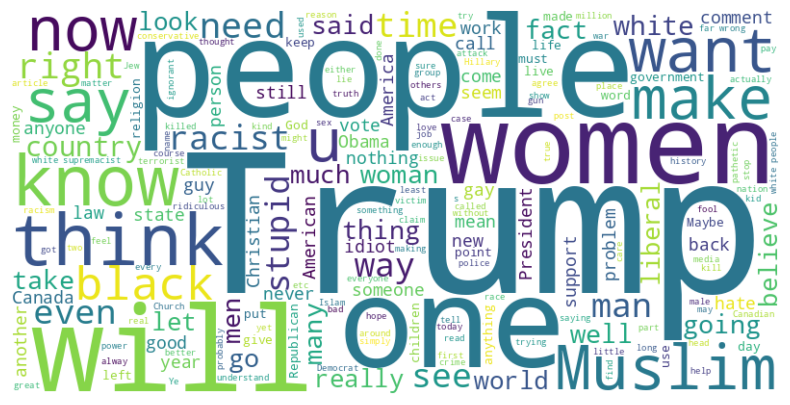

In [10]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white').generate("".join(nontoxic_comments))

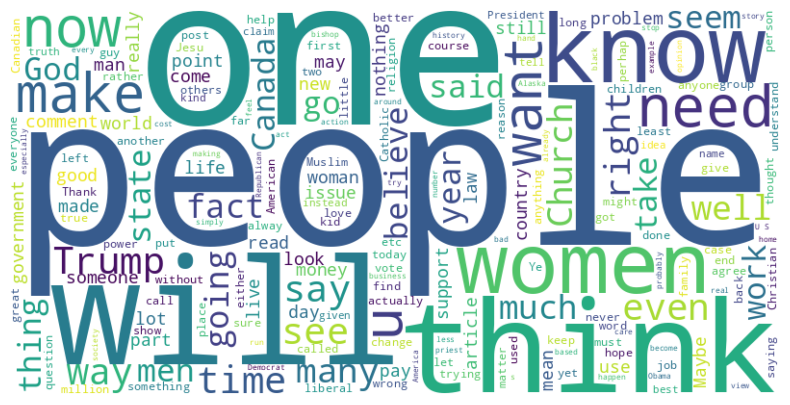

In [12]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
# Tokenize the comments
toxic_tokens = toxic_comments.apply(word_tokenize)
nontoxic_tokens = nontoxic_comments.apply(word_tokenize)

In [28]:
toxic_tokens[0]

['haha', 'you', 'guys', 'are', 'a', 'bunch', 'of', 'losers', '.']

## Remove Punctuation

Here we want to filter out non-alphabetical tokens

In [29]:
toxic_tokens = toxic_tokens.apply(lambda x: [word for word in x if word.isalpha()])
nontoxic_tokens = nontoxic_tokens.apply(lambda x: [word for word in x if word.isalpha()])

In [30]:
toxic_tokens[0]

['haha', 'you', 'guys', 'are', 'a', 'bunch', 'of', 'losers']

## Convert to Lowercase

to ensure uniformity we have to convert all words to lowercase

In [31]:
toxic_tokens = toxic_tokens.apply(lambda x: [word.lower() for word in x])
nontoxic_tokens = nontoxic_tokens.apply(lambda x: [word.lower() for word in x])

## Stopwords Removal

This will remove all the common words like: this, is, and, the, etc

In [32]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
                         
# stop_words contains a list of 179 words that we want to remove from our comments

toxic_tokens = toxic_tokens.apply(lambda x: [word for word in x if word not in stop_words])
nontoxic_tokens = nontoxic_tokens.apply(lambda x: [word for word in x if word not in stop_words])

In [33]:
toxic_tokens[0]

['haha', 'guys', 'bunch', 'losers']

## Lemmatization

Lemmatization reduces words to their base or dictionary form. It's usually more sophisticated than stemming.

In [69]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized = []
    for word in tokens:
        lemmatized.append(lemmatizer.lemmatize(word, pos=wordnet.VERB))
    return lemmatized

toxic_tokens = toxic_tokens.apply(lemmatize_tokens)
nontoxic_tokens = nontoxic_tokens.apply(lemmatize_tokens)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/ericmartinez/neufische_bootcamp/lexiguards/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/4d/pzd0shj50snbbx917dflpkb80000gn/T/ipykernel_15877/1235758477.py", line 12, in <module>
    toxic_tokens = toxic_tokens.apply(lemmatize_tokens)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ericmartinez/neufische_bootcamp/lexiguards/.venv/lib/python3.11/site-packages/pandas/core/series.py", line 4630, in apply
    return SeriesApply(self, func, convert_dtype, args, kwargs).apply()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ericmartinez/neufische_bootcamp/lexiguards/.venv/lib/python3.11/site-packages/pandas/core/apply.py", line 1025, in apply
    return self.apply_standard()
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ericmartinez/neufische_bootcamp/lexiguar

## Stemming

Stemming reduces words to their word stem or root form.

In [51]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

toxic_tokens = toxic_tokens.apply(lambda x: [stemmer.stem(word) for word in x])
nontoxic_tokens = nontoxic_tokens.apply(lambda x: [stemmer.stem(word) for word in x])

In [52]:
toxic_tokens[0]

['haha', 'guy', 'bunch', 'loser']

In [53]:
# getting a flat_list with all words

flat_token_list = []
for sublist in toxic_tokens:
    for token in sublist:
        flat_token_list.append(token)


In [70]:
len(flat_token_list)

1368039

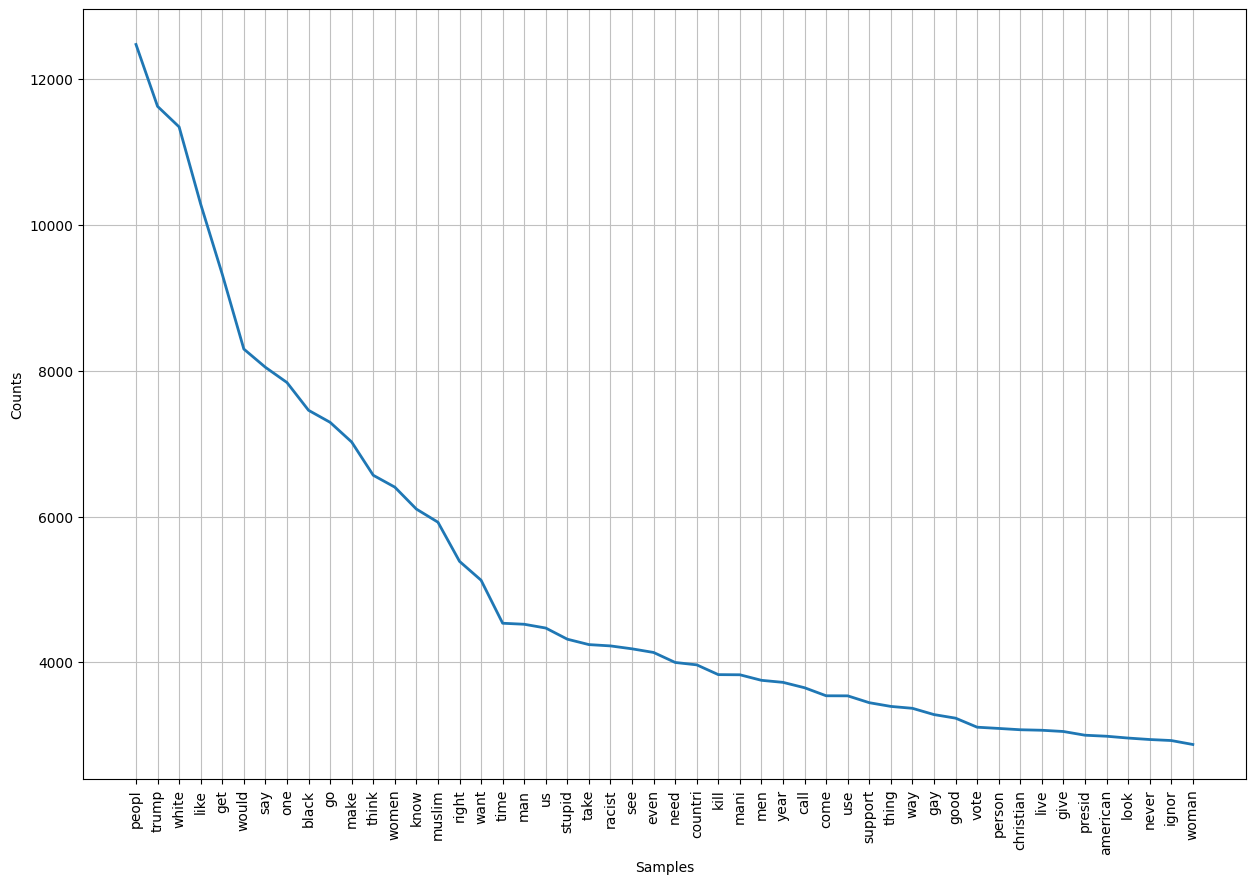

In [64]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Calculating frequency distribution
fdist = FreqDist(flat_token_list)

# Plotting the frequency distribution
plt.figure(figsize=(15, 10))
fdist.plot(50, cumulative=False) 
plt.show()

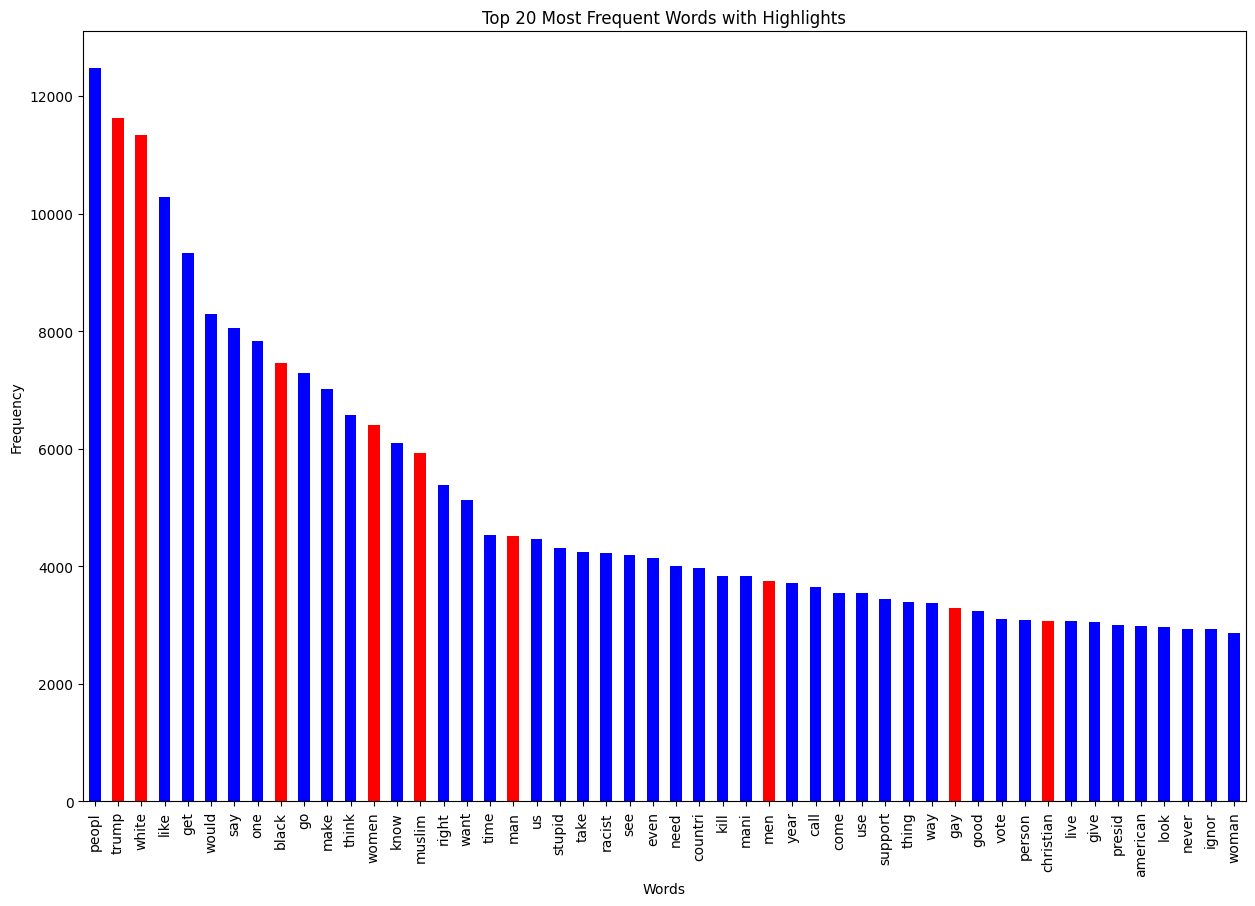

In [71]:


word_counts = pd.DataFrame(flat_token_list, columns=['word'])['word'].value_counts().head(50)

# Define the words to highlight
highlight = ['black', 'women', 'man', 'trump', 'white', 'muslim', 'men', 'gay', 'christian']

# Create a color array
colors = ['red' if word in highlight else 'blue' for word in word_counts.index]

# Plotting the bar chart
plt.figure(figsize=(15, 10))
word_counts.plot(kind='bar', color=colors)
plt.title('Top 20 Most Frequent Words with Highlights')
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.xticks(rotation=90)
plt.show()


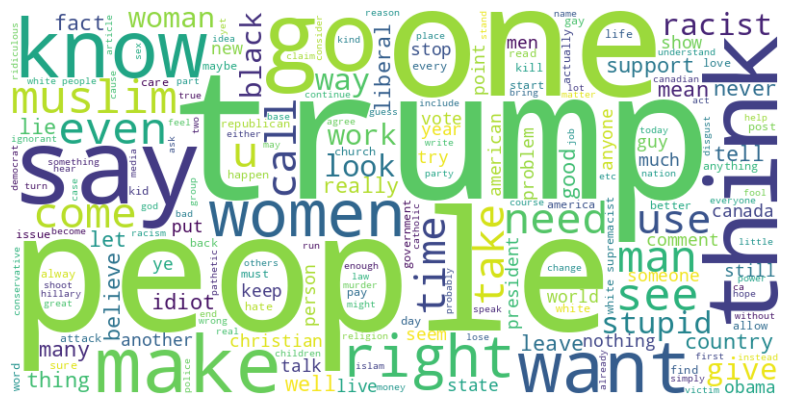

In [43]:
# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(flat_token_list))

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Bi-grams and tri-grams Analysis

In [66]:
from nltk import ngrams
from collections import Counter

# Generate bi-grams (2-grams)
bi_grams = ngrams(flat_token_list, 2)
bi_gram_counts = Counter(bi_grams)

# Generate tri-grams (3-grams)
tri_grams = ngrams(flat_token_list, 3)
tri_gram_counts = Counter(tri_grams)


In [67]:
# Print the 10 most common bi-grams
print("Most Common Bi-grams:")
for gram, count in bi_gram_counts.most_common(10):
    print(f"{gram}: {count}")

# Print the 10 most common tri-grams
print("\nMost Common Tri-grams:")
for gram, count in tri_gram_counts.most_common(10):
    print(f"{gram}: {count}")


Most Common Bi-grams:
('white', 'supremacist'): 1395
('white', 'peopl'): 1138
('mental', 'ill'): 751
('donald', 'trump'): 749
('black', 'peopl'): 705
('look', 'like'): 563
('white', 'men'): 491
('white', 'male'): 463
('sexual', 'assault'): 460
('peopl', 'like'): 446

Most Common Tri-grams:
('black', 'live', 'matter'): 317
('sexual', 'assault', 'women'): 92
('make', 'america', 'great'): 85
('nazi', 'white', 'supremacist'): 80
('presid', 'unit', 'state'): 76
('ha', 'ha', 'ha'): 71
('racist', 'white', 'supremacist'): 64
('could', 'care', 'less'): 63
('lisa', 'bloom', 'also'): 59
('liber', 'mental', 'disord'): 54


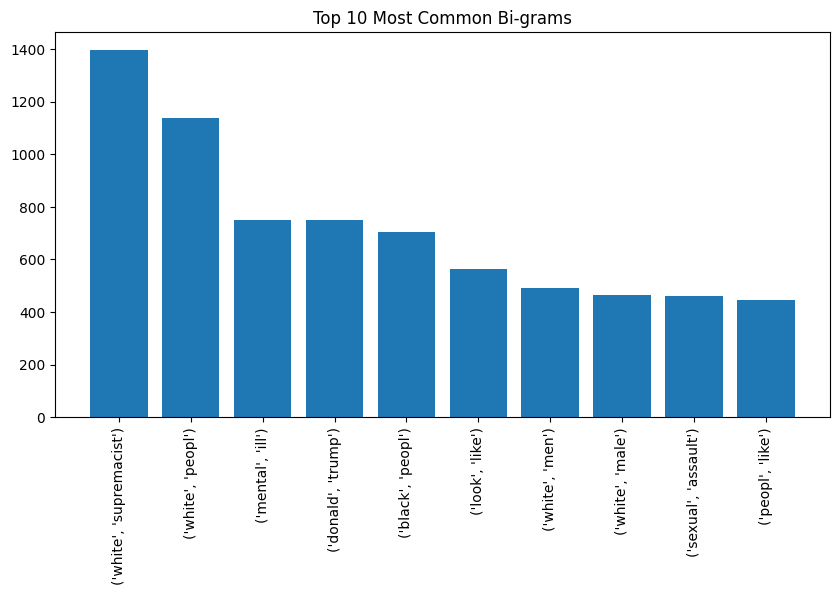

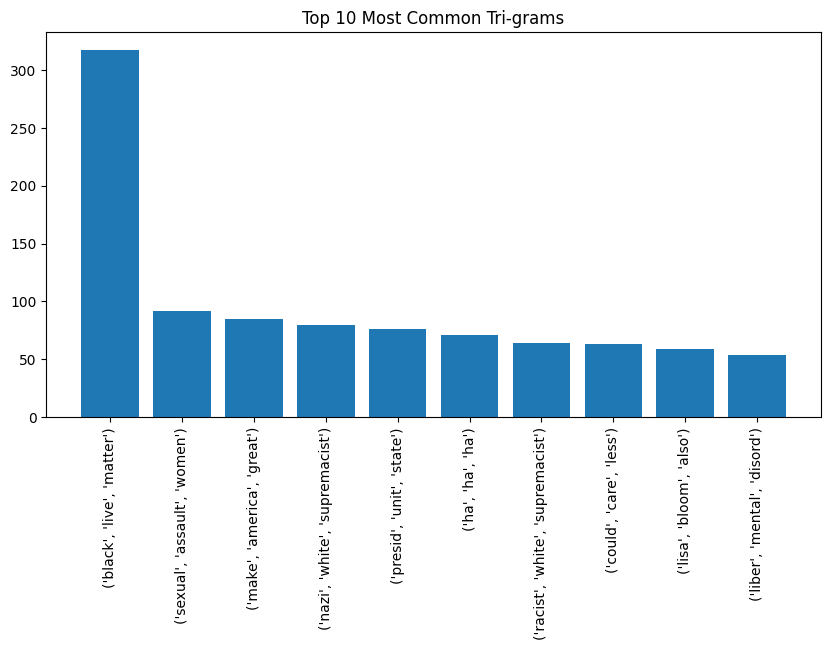

In [72]:
# Convert the bi-gram and tri-gram counts to DataFrames
df_bi_grams = pd.DataFrame(bi_gram_counts.most_common(10), columns=['bi_gram', 'count'])
df_tri_grams = pd.DataFrame(tri_gram_counts.most_common(10), columns=['tri_gram', 'count'])

# Plotting bi-grams
plt.figure(figsize=(10, 5))
plt.bar(df_bi_grams['bi_gram'].astype(str), df_bi_grams['count'])
plt.title('Top 10 Most Common Bi-grams')
plt.xticks(rotation=90)
plt.show()

# Plotting tri-grams
plt.figure(figsize=(10, 5))
plt.bar(df_tri_grams['tri_gram'].astype(str), df_tri_grams['count'])
plt.title('Top 10 Most Common Tri-grams')
plt.xticks(rotation=90)
plt.show()
